# Introduction to Natural Language Processing (NLP)
This Jupyter notebook was created for the 2018 AIS Natural Language Processing Workshop for the 2018 AI Conference at UT Dallas and focuses on using NLP techniques to build a sentiment classifier using data from 50,000 movie reviews.

## What is Natural Language Processing?
Natural language processing, often abbreviated as NLP, is a broad area of artificial intelligence concerned with allowing machines to process and extract meaning from large amounts of human language data. There are many tasks in natural language processing, but in this workshop, we will be focusing primarily on feature extraction from text data and sentiment analysis. 

### How to use this notebook
This notebook has several cells with Python code in them. To run a cell, click on the cell and then press **SHIFT + ENTER**. You can also go to the "Cell" menu and select "Run Cells" but it is a bit faster and easier to just use the **SHIFT + ENTER** keyboard shortcut.

### Installing the Libraries 
If you have the Anaconda distribution of Python, then you can install the necessary libraries using the following commands:

- **conda install numpy**
- **conda install pandas**
- **conda install sklearn**
- **conda install matplotlib**

If you do not have the Anaconda distribution of Python installed, you can use pip to install the libraries above with commands such as **pip install numpy** for example.

## Importing Libraries

In [1]:
import numpy as np # for linear algebra
import pandas as pd # for CSV file I/O and data manipulation
import sklearn # for machine learning
import matplotlib.pyplot as plt # For making plots
%matplotlib inline

## Reading in the Data - IMDb Movie Reviews Dataset
We will be using a dataset of 50,000 movie reviews that was used in a Stanford paper titled "Learning Word Vectors for Sentiment Analysis". If you are interested, you can find the paper here: http://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf
The original dataset, formatted as a CSV file, is included in the repository for this workshop, but you can also download the original dataset from http://ai.stanford.edu/~amaas/data/sentiment/ as a zip archive. Let's start by reading in the data as a dataframe object using the **read_csv** function from the **Pandas** library.

In [2]:
data = pd.read_csv('stanford_movie_data.csv') # pass in the name of the file
data.head(10) # looks at the first ten rows of the dataframe

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


As we can see above, our dataset contains a series of reviews, with the sentiment of each review provided in the **sentiment** column. If we want to get some information about our dataframe, we can use the **info()** function.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null int64
dtypes: int64(1), object(1)
memory usage: 781.3+ KB


Based on the output above, we can confirm that our data contains 50,000 entries, with two columns, and we can even get an estimate of how much space our dataframe consumes in memory.

## DataFrame Basics
Pandas dataframes are really useful tools for working with data because we can easily query the data and perform operations on the data.

### Accessing Specific Columns
We can use the following syntax to access specific columns of the dataframe.

In [4]:
data['review'] # Gets the review column of the data

0        In 1974, the teenager Martha Moxley (Maggie Gr...
1        OK... so... I really like Kris Kristofferson a...
2        ***SPOILER*** Do not read this, if you think a...
3        hi for all the people who have seen this wonde...
4        I recently bought the DVD, forgetting just how...
5        Leave it to Braik to put on a good show. Final...
6        Nathan Detroit (Frank Sinatra) is the manager ...
7        To understand "Crash Course" in the right cont...
8        I've been impressed with Chavez's stance again...
9        This movie is directed by Renny Harlin the fin...
10       I once lived in the u.p and let me tell you wh...
11       Hidden Frontier is notable for being the longe...
12       It's a while ago, that I have seen Sleuth (197...
13       What is it about the French? First, they (appa...
14       This very strange movie is unlike anything mad...
15       I saw this movie on the strength of the single...
16       There are some great philosophical questions. .

In [5]:
data['sentiment'] # Gets the sentiment column of the data

0        1
1        0
2        0
3        1
4        0
5        1
6        1
7        1
8        1
9        1
10       0
11       1
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       1
        ..
49970    1
49971    0
49972    1
49973    1
49974    0
49975    1
49976    0
49977    1
49978    0
49979    1
49980    0
49981    0
49982    0
49983    1
49984    0
49985    0
49986    0
49987    0
49988    0
49989    0
49990    0
49991    0
49992    0
49993    1
49994    1
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64

### Indexing/Slicing a Dataframe
If we want to get a specific row of a dataframe, we can use the following syntax.

In [6]:
data.iloc[0] # Grabs the first row of the dataframe

review       In 1974, the teenager Martha Moxley (Maggie Gr...
sentiment                                                    1
Name: 0, dtype: object

In [7]:
data.iloc[0:50] # Grabs rows 0 to 49 of the dataframe

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


### Selecting Data Based on Conditions
We can also select rows of our data based on certain conditions.

In [8]:
data[data['sentiment'] == 1] # Gets all positive reviews

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
3,hi for all the people who have seen this wonde...,1
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1
11,Hidden Frontier is notable for being the longe...,1
14,This very strange movie is unlike anything mad...,1
17,I was cast as the Surfer Dude in the beach sce...,1


## Preprocessing Text Data

Before we start working with NLP tools and actually getting into training machine learning algorithms, we need to preprocess the text data and remove unwanted characters such as HTML markup and punctuation. We can use Python's regex libary to do this. Just to show the an example of the effect of preprocessing, we can take a look at an entry in the review column before preprocessing and then after preprocessing.

In [9]:
data['review'][4]

'I recently bought the DVD, forgetting just how much I hated the movie version of "A Chorus Line." Every change the director Attenborough made to the story failed.<br /><br />By making the Director-Cassie relationship so prominent, the entire ensemble-premise of the musical sails out the window.<br /><br />Some of the musical numbers are sped up and rushed. The show\'s hit song gets the entire meaning shattered when it is given to Cassie\'s character.<br /><br />The overall staging is very self-conscious.<br /><br />The only reason I give it a 2, is because a few of the great numbers are still able to be enjoyed despite the film\'s attempt to squeeze every bit of joy and spontaneity out of it.'

As we can see above, some of our reviews may have HTML characters and punctuation that we want to remove. Let's go ahead and define and run our preprocessing function on the review data.

In [10]:
import re # regex library
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # Effectively removes HTML markup tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    return text

In [11]:
data['review'] = data['review'].apply(preprocessor) #Applies the preprocessor function to the data

Now let's take a look at this same entry in our preprocessed review data.

In [12]:
data['review'][4]

'i recently bought the dvd forgetting just how much i hated the movie version of a chorus line every change the director attenborough made to the story failed by making the director cassie relationship so prominent the entire ensemble premise of the musical sails out the window some of the musical numbers are sped up and rushed the show s hit song gets the entire meaning shattered when it is given to cassie s character the overall staging is very self conscious the only reason i give it a 2 is because a few of the great numbers are still able to be enjoyed despite the film s attempt to squeeze every bit of joy and spontaneity out of it '

As we can see, the same entry now has no HTML tages and punctuation. All of the characters have also been reduced to lowercase for uniformity.

## Feature Extraction from Text Data
A key problem that appears in NLP applications that involve machine learning is extracting features from text data. In general, this problem involves converting text data into a set of quantitative values or features that summarize the data in a form that machine learning algorithms can actually work with.

### Quick Definitions
Here are some terms that are frequently used throughout this tutorial that we should go ahead and define briefly before we proceed:
- **document**: an ordered collection of characters or words that constitute a single instance of text data. Example: a single movie review can count as a document.
- **corpus**: a usually large collection of documents that can be used for feature extraction techniques or generalizations on text data.
- **n-gram**: a contiguous sequence of **n items** from a sample of text. These items can be words, characters, or even syllables depending on the application.
- **unigram**: basically a single word or an **n-gram where n = 1**.
- **bigram**: basically a sequence of two continguous words, or an **n-gram where n = 2**.

### Bag of Words - Looking at the Frequency of Words
A popular and simple model for extracting features from text data is the **Bag of Words (BOW)** model. This model gets its name from the underlying assumption that each document can be treated as a **collection of words or n-grams** that does not take into account the order of the words but looks at the frequency of each word. 

This model is also called the **vector-space model** because it transforms each document in a corpus into a vector, where each component corresponds to the frequency of a particular word from the whole corpus in that specific document. This process is known as **count vectorization**. Let's go through an example to demonstrate how this process works.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer # import CountVectorizer module

Now that we have imported the CountVectorizer module, let's go ahead and fit a count vectorizer on a small corpus.

In [14]:
doc1 = 'I like cats'
doc2 = 'I like dogs and cats'
doc3 = 'The cats got the rats'
corpus = [doc1, doc2, doc3] # the corpus is basically a list of strings (documents)

count_vectorizer = CountVectorizer() # Creates a CountVectorizer with default parameters
count_vectorizer.fit(corpus) # Fits the count vectorizer on the corpus we just created

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Now that we have a CountVectorizer object that has been trained on a corpus, there are several operations that we can perform with it. First of all, let's take a look at the our count vectorizer's vocabulary - all of the unique words that the vectorizer found in the corpus.

In [15]:
count_vectorizer.vocabulary_

{'and': 0, 'cats': 1, 'dogs': 2, 'got': 3, 'like': 4, 'rats': 5, 'the': 6}

As we can see above, our vectorizer has seven words in its vocabulary. Single letter words such as "I" are not considered by default. The vocabulary is represented as a dictionary where the keys are the words or n-grams (a word is basically a 1-gram) and the values are the index of each word for the vectors of each document. To demonstrate this concept, let's actually convert some sentences to vectors using the **transform** function. Let's transform the first document into a vector.

In [16]:
doc1

'I like cats'

In [17]:
count_vectorizer.transform([doc1])

<1x7 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

If we try to transform the first document like this, notice how we get a **sparse matrix**. This is because in general, these vectors can become quite large, with many zeros when using a corpus with many words. Our corpus is really small but the transform function still outputs the vector in this format. If we want to actually see the vector, we can convert the sparse matrix to a dense matrix.

In [18]:
count_vectorizer.transform([doc1]).todense() # Allows us to see the actual values in the vector

matrix([[0, 1, 0, 0, 1, 0, 0]])

This vector basically tells us that the words **"cat"** and **"like"** both appear once in doc1 and the other words in the vocabulary do not appear at all. We can actually take any sentence or document and transform it into a vector with our count vectorizer. **The vectorizer ignores words that are not in its vocabulary.** Here are some examples:

In [19]:
count_vectorizer.transform(['I like cats and dogs, but not rats.']).todense() 

matrix([[1, 1, 1, 0, 1, 1, 0]])

In [20]:
count_vectorizer.transform(['Dogs are cool, but cats are scary! I do not like cats']).todense()

matrix([[0, 2, 1, 0, 1, 0, 0]])

### N-Grams and Bag of Words
In the previous examples, we were using the count vectorizer with just unigrams or single words. We can adjust the range of n-grams that our vectorizer considers to get different results. The **ngram_range** parameter allows us to pass in a tuple specifying the range of n-grams to consider.

In [21]:
count_vectorizer_bigram = CountVectorizer(ngram_range=(1,2)) # This will consider unigrams and bigrams
count_vectorizer_bigram.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [22]:
count_vectorizer_bigram.vocabulary_

{'and': 0,
 'and cats': 1,
 'cats': 2,
 'cats got': 3,
 'dogs': 4,
 'dogs and': 5,
 'got': 6,
 'got the': 7,
 'like': 8,
 'like cats': 9,
 'like dogs': 10,
 'rats': 11,
 'the': 12,
 'the cats': 13,
 'the rats': 14}

Notice how our vectorizer now has a larger vocabulary because it not only considers single words (unigrams) but also instances of two adjacent words (bigrams). 

### TF-IDF: A More Sophisticated Bag of Words Model
So far we have only worked with a simple bag of words model where we just count the frequencies of each vocabulary word in each document. However, one problem with this simple approach is that for a large corpus, words that frequently appear in the English language will have larger components when in reality, they do not contribute much to the overall meaning of each document. 

**TF-IDF**, short for **term frequency-inverse document frequency** is another bag of words approach that attempts to solve this problem. Rather than just computing the raw frequencies of each word in a document, the TF-IDF approach involves multiplying these frequencies by the **inverse** of a statistic representing the **frequencies of these words in the entire corpus**. The TF-IDF statistic is basically the **product** of the **term frequency** and **inverse document frequency** statistics as demonstrated in the equation below:

\begin{equation*}
TFIDF(t, d, D) = f_{t, d} \bullet log\frac{N_D} {n_t}
\end{equation*}

Where:
- $t$, $d$, and $D$ are the **term (word or n-gram)**, **document**, and **corpus** respectively.
- $f_{t,d}$ is the **term-frequency statistic**, which is just the **raw frequency** of the term $t$ in the document $d$.
- $N_D$ is the **total number of documents** in the corpus $D$.
- $n_t$ is the **number of documents** in which the term $t$ appears.

Notice that if a word appears in **every document**, which means $N_D = n_t$, then the TF-IDF statistic for that word will be zero because in that case $\frac{N_D} {n_t} = 1$ and $log(1) = 0$. This means words in the English language that are very common but do not contribute much to the meaning of the documents will likely have near-zero TF-IDF scores. These words are often called **stop words**. One of the reasons for using this logarithm in the equation is that **stop words** will usually receive scores that are close to, if not equal to zero.

#### Running TF-IDF on our small corpus
To demonstrate how TF-IDF differs from the simpler Bag of Words approach with just word frequencies, let's try fitting a TFIDF vectorizer on our corpus and transforming the same documents.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf = TfidfVectorizer()
tfidf.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [25]:
doc1

'I like cats'

In [26]:
tfidf.transform([doc1]).todense()

matrix([[0.        , 0.61335554, 0.        , 0.        , 0.78980693,
         0.        , 0.        ]])

Notice how we get floating point values rather than integer values for the components corresponding to the words "cat" and "like". Here are some more examples:

In [27]:
tfidf.transform(['I like cats and dogs, but not rats.']).todense()

matrix([[0.50461134, 0.29803159, 0.50461134, 0.        , 0.38376993,
         0.50461134, 0.        ]])

In [28]:
tfidf.transform(['Dogs are cool, but cats are scary! I do not like cats']).todense()

matrix([[0.        , 0.68499287, 0.57989687, 0.        , 0.44102652,
         0.        , 0.        ]])

## Sentiment Analysis - Combining Text Transformation and Machine Learning

Now that we have seen how to extract feature vectors from text data, we can start training machine learning models using those feature vectors.

### Train, Test, Split
Before we start training machine learning models on the data, we should split our data into a **training set** and a **testing set**. We can do this using SciKit-Learn's **train_test_split** tool.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### What's going on in the code above?
We did the following:

- Created a dataframe **X** to represent the **features of the data** that we will train the model on.
- Created a dataframe **y** to represent the **target variable** (whether the review is positive or negative).
- Created four dataframes using train_test_split:
    - **X_train**: represents the features in training data.
    - **X_test**: represents the features in testing data.
    - **y_train**: represents the target values in training data.
    - **y_test**: represents the target values in testing data.
    
### How train_test_split works

The train_test_split function takes our features (X) and our target values (y) and splits them into training and testing sets.
- **test_size**: Represents the proportion of the data that will be used to test the data.
- **random_state**: Just a random seed for randomly performing the split. 

### Naive Bayes for Sentiment Classification
Naive bayes is a very simple classification algorithm with fast training times and generally good performance for text classification tasks. It involves applying Bayes' Theorem with the "naive" assumption that all of the features are independent from each other. Naive bayes is based on the concept of conditional probability. Given an instance of $n$ features $x = (x_1, ... x_n)$ and a set of $k$ classes $C = (C_1, ..., C_k)$, this algorithm assigns conditional probabilities in the following form for each of the $k$ classes:

\begin{equation*}
p(C_k \space| \space (x_1, ..., x_n))
\end{equation*}

The expression above basically represents the probability of the class $C_k$ given the features in $x$. In the context of our sentiment analysis problem, there are two classes (1 and 0) where one represents a positive review and the other represents a negative review. The feature vector $x$ for this problem is basically the TF-IDF vector with the scores for each word in the corpus for a particular review. 

Bayes' Theorem, with reference to this conditional probability is:

\begin{equation*}
p(C_k \space| \space x) = \frac{p(C_k)p(x \space | \space C_k)}{p(x)}
\end{equation*}

Basically, this theorem, in the context of our problem, states that the probability of a review being belonging to a specific class $C_k$ (ie. positive or negative) is equal to the probability of the class $C_k$ multiplied by the probability of the TF-IDF vector $x$ given that it belongs to the class $C_k$ divided by the probability of the TF-IDF vector $x$.

We can expand the conditional probability of the TF-IDF vector as a product of each of the conditional probabilities of each of its components with respect to the class $C_k$. Let's assume that the vector $x$ has the components $x_1$, $x_2$, ... $x_n$. Then our equation becomes:

\begin{equation*}
p(C_k \space | \space x) = \frac{p(C_k)p(x_1 \space | \space C_k)p(x_2 \space | \space C_k)...p(x_n \space| \space C_k)}{p(x_1)p(x_2)...p(x_n)}
\end{equation*}

We can expand $p(x)$ and $p(x \space | \space C_k)$ as products because naive bayes is based on the "naive" assumption that **each of our features are independent**.

Given these equations and a TF-IDF vector for a given review, the naive bayes algorithm involves calculating the conditional probability of each possible class given the features in the vector and then selecting the **class with the highest conditional probability**.

#### Calculating the probability of each feature
One question that remains in our discussion of this algorithm is how can we can actually calculate the probability of each feature in the TF-IDF vector? There are a few different versions of naive bayes that use different probability distributions to calculate the probability of each feature.

#### Gaussian Naive Bayes - The Normal/Gaussian Distribution
Gaussian naive bayes assumes that each feature belongs to a **normal** or **gaussian** distribution. The behavior of the normal distribution is determined by two parameters, the **mean** and the **standard deviation**. A standard normal distribution has a **mean of 0** and a **standard deviation of 1**. The standard normal distribution can be graphed using the following equation (the PDF or probability density function of the distribution):

\begin{equation*}
f(z) = e^{(\frac {-z^2}{2})}
\end{equation*}

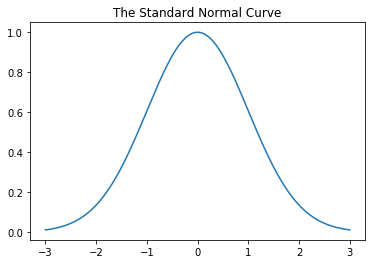

In [31]:
z_values = np.linspace(-3,3,num=1000)
function_values = np.exp(-1 * (z_values **2 )/2) # Plotting the function above
plt.plot(z_values, function_values)
plt.title("The Standard Normal Curve")

In order to scale this curve to data without a mean of 0 and a standard deviation of 1, we can take each observation $ x $ and calculate the z-score $z$ based on the mean $\mu$ and the standard deviation $\sigma$. 

\begin{equation*}
z = \frac {x - \mu} {\sigma}
\end{equation*}

The resulting PDF, which results from substituting the expression above for z, is as follows:

\begin{equation*}
f(x) = e^{{- (\frac {x - \mu} {2\sigma})^2}}
\end{equation*}

We can calculate the probability of a range of values by finding the area under the curve for this range of values. Because the probability of a single value is not defined in such a distribution, we can split the distribution into ranges or quantiles and find the probability of the a value fitting into a specific range.

#### Multinomial Naive Bayes - using the multinomial distribution
This variant of naive bayes is commonly used in text classification and assumes that the features belong to a multinomial distribution. The distribution is parameterized by the vectors $ \theta_{y} = (\theta_{y1}, ... \theta_{yn})$ where $n$ is the number of features (in our case the size of the vocabulary) and $y$ is the class for which we are computing the vector, and $\theta_{yi}$ is the probability $p(x_i | y)$ of feature $i$ appearing in a sample belonging to the class $y$.

The parameters $\theta_{y}$ are estimated using the following equation:

\begin{equation*}
\hat \theta_{yi} = \frac {N_{yi} + \alpha} {N_{y} + \alpha n}
\end{equation*}

Equation source: SciKit-Learn documentation: http://scikit-learn.org/stable/modules/naive_bayes.html

Where $N_{yi}$ is **the number of times** feature $i$ appears **in a sample** of class $y$ in the training data and $N_{y}$ is the **total count of all features** for class $y$. The parameter $\alpha$ is a **smoothing parameter** that is used to prevent zero probabilities for features not present in learning samples.

#### Bernoulli Naive Bayes - using the Bernoulli distribution 
Bernoulli naive bayes is based on the assumption that the features belong to a Bernoulli distribution. This distribution treats each feature as a binary-valued (boolean or Bernoulli) variable. The possible outcomes are essentially 1 (success) or 0 (failure) and the distribution is parameterized by a probability $p$ of success. Since TF-IDF vectors do not contain binary features, a Bernoulli naive bayes classifier will automatically binarize these features by dividing the feature range. 

#### Combining TF-IDF and Naive Bayes Using a Pipeline
Here we will combine the TF-IDF vectorizer and the naive bayes algorithm into a single classifier using a SciKit-Learn's Pipeline module. We will then train this classifier on the training data.

In [31]:
from sklearn.naive_bayes import MultinomialNB # We will be using Multinomial Naive Bayes here
from sklearn.pipeline import Pipeline # This module allows us to chain different operations together

In [32]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('naive_bayes', MultinomialNB())])
nb_pipeline.fit(X_train, y_train) # Fits the classifier on the training data

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...     vocabulary=None)), ('naive_bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Evaluating our TF-IDF/Naive Bayes Algorithm
Now that we've trained our sentiment classifier on the training data, we can go ahead and evaluate it using the test data. We will first have our classifier generate predictions on the test features (**X_test**) and then compare these predictions to the correct labels (**y_test**).

In [33]:
from sklearn.metrics import classification_report,accuracy_score # Metrics for evaluating our model

In [34]:
pred = nb_pipeline.predict(X_test) # Generates predictions on the test data
print(classification_report(pred, y_test)) # generates a classification report with several metrics
print('Accuracy on test set: {} %'.format(100*accuracy_score(pred, y_test)))  # prints out the accuracy on the test set

             precision    recall  f1-score   support

          0       0.89      0.85      0.87      7821
          1       0.85      0.89      0.87      7179

avg / total       0.87      0.87      0.87     15000

Accuracy on test set: 86.84666666666668 %


Even with a relatively simple naive bayes approach, our classifier achieved over 86% accuracy on the test set. Here is what the other metrics mean:

- **precision**: the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations. For example in the row labeled 1 above, this is the number of times our model correctly predicted a positive review divided by the total number of times our model predicted a positive review.
- **recall**: the ratio of correctly predicted positive observations to all observations actually in that class. For example, in row 1, this is number of times our model correctly predicted a positive review divided by the actual number of positive reviews.
- **f1-score**: the harmonic mean of precision and recall. The harmonic mean is often roughly equivalent to the average of two values in most cases.

The f1-score is given by the following equation:

\begin{equation*}
F_{1} = 2 \bullet \frac{precision \bullet recall} {precision + recall}
\end{equation*}

### Using K-Fold Cross Validation
Cross validation is a technique for evaluating model performance that is similar to what we have been doing so far. A common form of cross validation, known as **k-fold cross validation**, involves splitting a dataset into a single multiple sections called **folds** (k folds to be exact!) and in a single iteration, using **k-1 folds for training** and just **one fold for testing**. This process is then repeated **k times** with a different fold being used as test data each time. The values of the evaluation metrics for each **iteration** can then be averaged to get a more robust measure of a model's performance. This practice is better than using the same test set again and again because optimizing a model's performance on one specific test set in effect makes that test set a part of the training set. 

### SciKit-Learn's cross_val_score function
Fortunately, SciKit-Learn has a very convenient function for computing the cross validation scores for a given model. This function returns a list (array) with the cross validation scores for the model. Here is an example:

In [35]:
from sklearn.model_selection import cross_val_score # Module for cross validation
cross_val_score(nb_pipeline, X, y, scoring='accuracy', cv=3) # The cv parameter is the number of folds/iterations to use

array([0.86459083, 0.8625345 , 0.86091444])

### Testing our model on raw text data
Just to convince ourselves that our classifier actually works, we can try testing it on raw text reviews that we can make up on the spot. Our classifier will return a Numpy array with a single value of 1 or 0 depending on whether it predicts that the review is positive or negative respectively.

In [36]:
nb_pipeline.predict(['That was a great movie!'])

array([1])

In [37]:
nb_pipeline.predict(['That was a terrible movie!'])

array([0])

### Logistic Regression for Sentiment Classification
Unlike what the name suggest, **logistic regression** is designed specifically for **classification** and is especially suited for **binary classification** problems. The real **"regression"** in logistic regression involves finding the best values in a weight vector that is used to compute a weighted sum of the input features. This weighted sum is then passed to a function called the **sigmoid function** also known as the **logistic function**. This function has a special property where it takes any real-valued input and outputs a continuous value between 0 and 1. In general, if the output of this function is below 0.5 we can assign the input to class 0 and if the output is greater than or equal to 0.5, we can assign the input to class 1.

### How Logistic Regression Works
The **logistic function** is defined as:

\begin{equation*}
\phi (z) = \frac {1} {1+e^{-z}}
\end{equation*}

To better illustrate the concept of the **logistic function**, the function has been plotted below in the interval [-10, 10]. Notice how the function forms an S-shaped curve with horizonal asymptotes at y = 0 and y = 1. What's special about this function is that it can take any real value and output a value between 0 and 1, which is really useful for representing probabilities.

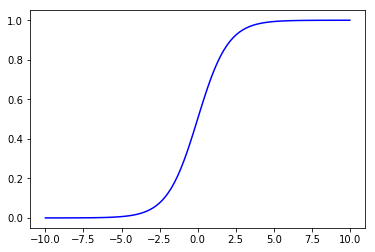

In [39]:
X_values = np.linspace(-10, 10, 100)
y_values = 1/(1 + np.exp(-1*X_values))
plt.plot(X_values, y_values, color='Blue')

#### Where this function comes from - log odds (logit)
This function comes from the concept of the odds ratio in probability, which for a probability p, of a given event, is defined as:
\begin{equation*}
odds(p) = \frac {p} {(1-p)}
\end{equation*}

For example, if you hear someone say the odds of an event are 1:1, then that means there is a 50% chance of that event happening.

By taking the natural logarithm (ln) of both sides, we can define the **logit** or **log odds** function. 
\begin{equation*}
logit(p) = ln \frac {p} {(1-p)}
\end{equation*}

The **logistic function** which we defined earlier is actually the **inverse** of the **logit** function. 

#### Applying the Logistic Function to a Weighted Sum of Features
The logistic regression model is based on the following equation:

\begin{equation*}
logit \ (p(y=1 \ | \ x)) = w_0 x_0 + w_1 x_1 + ... + w_m x_m = \sum_{i=0}^n w_m x_m = w^T x
\end{equation*}

Where:
- $ x = (x_0, x_1, ..., x_n) $ represents the input in the form of a vector of features given to the model.
- $ p(y=1 \ | \ x) $ is the conditional probability that given an input $ x $, the data point belongs to the class $ y = 1 $. For our case, this is probability that given the values of variables like Gender, Age, Class, etc. that a person survived the Titanic.
- $ w = (w_0, w_1, ..., w_n) $ represents a vector of numerical weights that will be used to compute the weighted sum of the inputs.
- $ w^T x $ is just a short way to write the weighted sum of the features using matrix notation. Since x and w are actually just one dimensional matrices (vectors), this is basically equivalent to taking the dot product of x and w (multiply each feature by each corresponding weight and add them up!).

By applying the **logistic function** to **both sides** of the equation above we get the following result:

\begin{equation*}
p(y=1 \ | \ x) = \phi(w^T x)
\end{equation*}

This basically means that the output that comes from applying this function to a weighted sum of the features gives us the probability that an observation belongs to the class 1. In our case, the raw output from the model when making a prediction will give us the probability that a person survived the titanic. Hence, if this probability is **greater than our equal to 0.5** (**50% or more chance** they survived) then our model predicts that the person survived. Otherwise, the model predicts that the person did not survive.

#### How to logistic regression generates class predictions
The class predictions that come out of a logistic regression model are based on the following equation:

$$
y =
  \begin{cases}
    1 &\text{if } \phi(w^T x) \ge 0.5\\
    0 &\text{if } \phi(w^T x) < 0.5
  \end{cases}
$$

#### How the model learns the weights
The process of "learning" in logistic regression involves determining the **optimal weights** in the weight vector to **minimize** a cost function defined below for a weight vector $w$:

\begin{equation*}
Cost(w) = \sum_{i=0}^n \frac {1} {2} (\hat y_i - y_i)^2 + \frac {\lambda} {2} \sum_{j=1}^m |w_{j}^2|
\end{equation*}

Note that the first part of this function is essentially half the sum of squared errors between the predicted values (classes) denoted as $\hat y_i$ for the ith observation in the data and the actual values, denoted as $y_i$ for the ith observation in the data. For a given weight vector $w$ and an input $x_i$ we know that $\hat y_i = \phi(w^T x_i)$ based on the equation for the logistic regression algorithm. The second half of the equation, $ \frac {\lambda} {2} \sum_{j=1}^m w_{j}^2 $ is known as the regularization term and is used to control the values of weights by adding a constant times the square of the magnitude of the weight vector to the cost function.

#### Visualization to summarize what we have covered above
<img src="logistic_regression.png" style="height:300px; width:700px;"/>

Image Credit: Sebastian Raschka, url: https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html
#### Why do we call it a cost function? What is the purpose of a cost function?
The cost function is used to quantify how bad our classifier is doing at making predictions on training data. Cost functions are sometimes called **loss functions** but the idea is the same - both tell us how bad our classifier is doing and in general, we want to **minimize** the values of these functions, which is like minimizing a cost or loss. In algorithms that involve learning numerical weights, cost functions give our algorithms a metric for which to learn the optimal weights.

#### How do we actually minimize the cost function
The process of minimizing the cost function involves an optimization process known as **gradient descent**. The idea behind gradient descent is that we can exploit the fact that our cost function is quadratic by looking at the direction in which our cost function is changing with respect to the weights (basically a derivative) and update our weights in a manner that causes our cost function to continue decreasing until we reach the global minimum, or the vertex of our quadratic curve. The mathematical details of this optimization method are out of the scope of this workshop, but are commonly used in deep learning and if you are interested, you can read more here: http://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

#### An intuitive visualization of gradient descent
<img src="gradient_descent.png" style="height:450px; width:600px;"/>

Image Credit: Sebastian Raschka, url: https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

#### What is regularization? 
Regularization is a common practice in machine learning used to control **overfitting** - the situation in which a model becomes too constrained to the patterns in the training data and fails to generalize to unseen data. Regularization works by adding a term that involves the magnitude of the weight vector to the cost function. Doing so penalizes larger weights and prevents any one feature from receiving too much weight in the model. There are two common types of regularization used for logistic regression and those are L2 and L1 regularization. 

- **L2 Regularization**: This form of regularization is the same as regularization used in the original cost function above and involves the regularization term $ \frac {\lambda} {2} \sum_{j=1}^m w_{j}^2 $.
- **L1 Regularization**: This form of regularization involves a different regularization term $ \frac {\lambda} {2} \sum_{j=1}^m |w_{j}| $. The difference here is that we are summing the absolute values of each weight and multipyling by a constant. L1 regularization tends to produce weight vectors where less important features have weights that are close to, if not exactly zero. For this reason, this type of regularization is often good for feature selection.

The constant related to logistic regression that we use to optimize the amount of regularization is referred to as $ C $ and is related to the regularization parameter $ \lambda $ by the following equation:

\begin{equation*}
C = \frac {1} {\lambda}
\end{equation*}

When training a logistic regression model in SciKit-Learn we can pass in values for C and specify the type of regularization that we want to use.

### Training a Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

In [46]:
# We will train a logistic regression model with a C value of 1 with L2 regularization.
lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression(C=1, penalty='l2'))])
lr_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

### Evaluating our Logistic Regression Model

In [40]:
pred = lr_pipeline.predict(X_test)
print(classification_report(pred, y_test))
print('Accuracy on test set: {} %'.format(100*accuracy_score(pred, y_test)))

             precision    recall  f1-score   support

          0       0.89      0.90      0.90      7367
          1       0.91      0.89      0.90      7633

avg / total       0.90      0.90      0.90     15000

Accuracy on test set: 89.64666666666666 %


### Determining the Optimal Regularization Parameters using Grid Search
We can improve the performance of our logistic regression model by optimizing the regularization parameters - the value for C and the type of regularization (L1 or L2). Since we have multiple parameters to optimize, we can use a procedure called **grid search** to test all the different combinations of parameters for a given range of values and then find the parameters for which the model performs the best using cross-validation. SciKit-Learn has a module known as **GridSearchCV** that we can use for this process.

In [41]:
from sklearn.model_selection import GridSearchCV # Module for grid search

#### Explanation of Parameters for GridSearchCV
The GridSearchCV constructor takes the following parameters:
- **estimator** - specifies the algorithm that we want to perform grid search on
- **param_grid** - a dictionary or list of dictionaries with the parameter values that we want to test
- **scoring** - the evaluation metric used for cross validation
- **cv** - the number of cross validation folds to use
- **n_jobs** - the number of parallel threads to use in the training and testing process
- **verbose** - tells the program how verbose the output should be (possible values are 0, 1, or 2)

Note that the code below takes at least 1 minute and 30 seconds to run and may take longer depending on the your computer.

In [44]:
param_grid = {'lr__penalty':['l1', 'l2'], 'lr__C': [3.0, 4.0, 5.0]}
lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])
lr_grid = GridSearchCV(estimator=lr_pipeline, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=6, 
                    verbose=1)
lr_grid.fit(X, y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=6)]: Done  18 out of  18 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'lr__penalty': ['l1', 'l2'], 'lr__C': [3.0, 4.0, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

We can find the best score for our grid search as demonstrated below:

In [45]:
lr_grid.best_score_

0.90072

So our best model from the GridSearchCV achieves over 90% 3-fold cross validation accuracy. We can view the scores for each combination of parameters as shown below:

In [46]:
lr_grid.grid_scores_

//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.89300, std: 0.00117, params: {'lr__C': 3.0, 'lr__penalty': 'l1'},
 mean: 0.90006, std: 0.00096, params: {'lr__C': 3.0, 'lr__penalty': 'l2'},
 mean: 0.89134, std: 0.00139, params: {'lr__C': 4.0, 'lr__penalty': 'l1'},
 mean: 0.90064, std: 0.00031, params: {'lr__C': 4.0, 'lr__penalty': 'l2'},
 mean: 0.89010, std: 0.00230, params: {'lr__C': 5.0, 'lr__penalty': 'l1'},
 mean: 0.90072, std: 0.00045, params: {'lr__C': 5.0, 'lr__penalty': 'l2'}]

We can also access the best model from our grid search and use it to make predictions as follows:

In [47]:
lr_grid.best_estimator_.predict(["Batman vs Superman was a complete disappointment!"])

array([0])

### Deep Learning for Sentiment Analysis
Deep learning is a subfield of machine learning that focuses on the use of algorithms involving neural networks. Neural networks are biologically-inspired computational structures with neurons in a graph with connections that are analagous to synaptic connections in neural systems.

<img src="neural_net.png" style="height:300px; width:550px;"/>

As we can see in the image above, neural networks have a series of layers, described in detail below:

- **input layer** - this layer contains the inputs or features that go into the deep learning model.
- **hidden layers** - these layers between the input and output contain **weighted connections** that the model **learns** in order to make predictions.
- **output layer** - this layer contains the outputs or predictions of the deep learning model.

Each connection in the network has a numerical weight attached to it and the model learns the weights similar to how the logistic regression algorithm determines the optimal weight parameters. Each neuron or node in the graph also has an associated **activation function**. The **sigmoid or logistic function** that we defined in the logistic regression section is a commonly used activation function for neural networks.

The process of computing the values at each neuron in the network is driven by matrix multiplication. Each set of weights connecting adjacent layers can be represented by a weight matrix. This weight matrix can be multiplied with the values of the neurons in the previous layer and then after applying the **activation function** to the result of the matrix multiplication, the results represent the values of the neurons in the next layer.

This neural network architecture that we are referring to is often called the Multi-Layered Perceptron (MLP) architecture.

Like logistic regression, neural networks also involve learning the weights to optimize an objective cost function.

#### Visualizing the concept of weights and activations
<img src="neural_net_math.png" style="height:500px; width:700px;"/>

Image Credit: https://matrices.io/deep-neural-network-from-scratch/

#### How does the model learn the weights?
Neural networks use the same general gradient descent procedure used in logistic regression to optimize the weights. However, in this case, each weight is updated using a more general approach known as backpropagation, which involves iteratively applying the chain rule to figure out how much the cost function is changing with respect to each weight and then updating each weight accordingly based on a learning rate parameter. 

#### Training a Deep Learning Sentiment Classifier
We can also create pipelines with TF-IDF and deep learning models using SciKit-Learn.

In [48]:
from sklearn.neural_network import MLPClassifier

In [51]:
tfidf_neural_net = Pipeline([('vectorizer', tfidf), ('mlp', MLPClassifier(hidden_layer_sizes=(30, 30)))])
tfidf_neural_net.fit(X_train, y_train)                   

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [ ]:
pred = tfidf_neural_net.predict(X_test)
print(classification_report(pred, y_test))
print('Accuracy on test set: {} %'.format(100*accuracy_score(pred, y_test)))

Based on the test above, we can see that our deep learning classifier scores just over 89 % accuracy, which is almost as good as the optimized logistic regression classifier.

## Defining a Function to Predict Sentiment of Reviews
Now that we have trained some classifiers that can predict the sentiment of reviews with high levels of accuracy, we can take our best classifier, fit it on the entire dataset, and define a function that takes in a review as a string and labels the review as positive or negative.

In [42]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression(C=5.0))])
pipeline.fit(X, y)

def analyze_sentiment(string):
    if pipeline.predict([string]) == [1]:
        return "Positive review!"
    else:
        return "Negative review!"

In [43]:
analyze_sentiment("There are movies that are bad. There are movies that are so bad they're good. And then there's Troll 2, a movie that's so bad it defies comprehension.")

'Negative review!'

In [55]:
analyze_sentiment("The Death of Stalin was the most realistic and well-directed historical film of 2018.")

'Positive review!'

In [44]:
analyze_sentiment("That movie was really good!")

'Positive review!'

In [45]:
analyze_sentiment("That movie was really not good!")

'Negative review!'

# Contact Info
**Amol Mavuduru**

**Email**: axm168430@utdallas.edu